In [1]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import configparser

# paths
config = configparser.ConfigParser()
config.read("ConfigFile.ini")
pf = config['PATHS']['datasets']
pf = os.path.join(pf,"test_data/CSFselection/{selection}h_*.0.nc")


# Influence of clear sky fit requirements

In the paper, the clear sky fit of a day with a clear sky model assumes that clear skies are detected in at least 2 separate hours in the irradiance observer data. This is proposed as a trade-off between accuracy and data availability. 

Potentially, the more observations available at different sun positions throughout the day, the more accurate the clear sky fit will be.

Here the influence of the prerequisite for the clear sky fit is tested.  This analysis is not explicitly shown in the paper.Individually selected days with continuous clear sky are used as reference.   The clear sky fit is limited to observations in one hour up to four hours. The fitted irradiance is then compared with the clear sky observations. The plot shows RMSE and bias against the different sun positions available for the fit. Areas covered by different selection criteria are delimited in the lower panel. Naturally, with a low number of hours, only a small interval of sun elevations is available for the fit. This increases the inaccuracy.


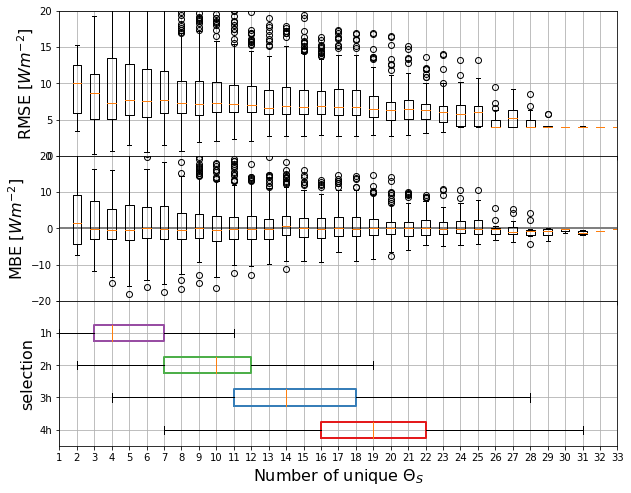

In [2]:

fig=plt.figure(figsize=(10,8))
axs = fig.subplots(3,1)

colors = ['#e41a1c',
          '#377eb8',
          '#4daf4a',
          '#984ea3']

for s,selection in enumerate([4,3,2,1]):
    mu0s = np.array([])
    for fn in glob.glob(pf.format(selection=selection)):

        ds = xr.open_dataset(fn)
        if len(ds.MBE.values)==0:
            continue
        ds = ds.rename_dims({'MBE':'N',
                            'RMSE':'N',
                            'mu0N':'N',
                            'mu0max':'N',
                            'mu0min':'N'})
        mu0s = np.concatenate((mu0s,ds.mu0N.values),axis=0)

        if s==0:
            rmse=[]
            mbe=[]
            for i in range(0,35):
                ds_sel = ds.where(ds.mu0N==i,drop=True)
                rmse.append(list(ds_sel.RMSE.values))
                mbe.append(list(ds_sel.MBE.values))
        else:
            for i in range(0,35):
                ds_sel = ds.where(ds.mu0N==i,drop=True)
                rmse[i] = rmse[i] + list(ds_sel.RMSE.values)
                mbe[i] = mbe[i] + list(ds_sel.MBE.values)

    axs[2].boxplot([mu0s],vert=False,widths=0.5,showfliers=False,showmeans=False,positions=[s],
                   boxprops={'color':colors[s],'linewidth':2})           
axs[0].boxplot(rmse)
axs[0].set_xlim(1,33)
axs[0].set_ylim(0,20)
axs[0].grid()
axs[0].set_xticks(np.arange(1,34))
axs[0].set_xticklabels([]*33)
axs[0].set_ylabel(r'RMSE $\left[Wm^{-2}\right]$',fontsize=16)


axs[1].plot([0,35],[0,0],color=(0.5,0.5,0.5),linewidth=2)
axs[1].boxplot(mbe)
axs[1].set_xlim(1,33)
axs[1].set_xticklabels([]*33)
axs[1].set_ylim(-20,20)
axs[1].grid()
axs[1].set_ylabel(r'MBE $\left[Wm^{-2}\right]$',fontsize=16)


axs[2].set_xlim(1,33)
axs[2].set_yticks(np.arange(0,5))
axs[2].set_yticklabels(['4h','3h','2h','1h',''])
axs[2].set_xticks(np.arange(1,34))
axs[2].grid()
axs[2].set_ylabel('selection',fontsize=16)
axs[2].set_xlabel(r'Number of unique $\Theta_S$',fontsize=16)

plt.subplots_adjust(hspace=0,wspace=0)
plt.savefig("Figures/FigXX_showcase_CSF_selection.pdf",dpi=300)